In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Import esenciales limpios para c:\FRANK MODELO\GITHUB\HEART-FAILURE-PROJECT\notebooks\models.ipynb
import pandas as pd
from pathlib import Path
import joblib
import optuna
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

In [3]:
ROOT = Path.cwd().parent
path_raw = ROOT / "data" / "processed" / "heart_clean.csv"
df = pd.read_csv(path_raw)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
import sys
root = Path.cwd().parent
if str(root) not in sys.path:
    sys.path.append(str(root))

In [5]:
from src.models import (
    baseline,
    randomforest_basemodel,
    svc_basemodel,
    decisiontree_basemodel,
    xgboost_basemodel,
    logistic_regression_optuna,
    random_forest_optuna,
    svc_optuna,
    create_triple_stacking,
    plot_ensemble_importance,
)

In [6]:
# Just using a simple train test split and a baseline model as Logistic Regresion with default parameters
baseline(df, "HeartDisease")

Confusion Matrix:
[[98 13]
 [15 98]]
Score in Training set: 0.8601532567049809
Score in Test set: 0.875

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       111
           1       0.88      0.87      0.88       113

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.88       224
weighted avg       0.88      0.88      0.88       224

ROC-AUC Score: 0.9380


In [7]:
randomforest_basemodel(df, "HeartDisease")

Confusion Matrix:
[[67  4]
 [ 9 70]]
Score in Training set: 1.0
Score in Test set: 0.9133333333333333

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        71
           1       0.95      0.89      0.92        79

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150

ROC-AUC Score: 0.9583


In [8]:
svc_basemodel(df, "HeartDisease")

Confusion Matrix:
[[66  5]
 [10 69]]
Score in Training set: 0.9010067114093959
Score in Test set: 0.9

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        71
           1       0.93      0.87      0.90        79

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150

ROC-AUC Score: 0.9551


In [9]:
decisiontree_basemodel(df, "HeartDisease")

Confusion Matrix:
[[64  7]
 [14 65]]
Score in Training set: 1.0
Score in Test set: 0.86

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        71
           1       0.90      0.82      0.86        79

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150

ROC-AUC Score: 0.8621


In [10]:
xgboost_basemodel(df, "HeartDisease")

Confusion Matrix:
[[67  4]
 [13 66]]
Score in Training set: 1.0
Score in Test set: 0.8866666666666667

--- Informe de Clasificación (Test Set) ---
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        71
           1       0.94      0.84      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

ROC-AUC Score: 0.9472


### WE OBSERVED THAT THERE ARE THRE BASICS MODELS , CONSIDERING THAT THEY ARE CALCULATED EACH ONE DIFERENTLY, THERE IS NO CORRELATION .
WE ARE GOING TO USE A OPTUNA SEARCH TO DETERMINE THE BEST HIPER PARAMETERES , THEN CALCULATED 

In [11]:
params_finales_lr = logistic_regression_optuna(df, "HeartDisease")

[I 2025-12-24 17:46:11,464] A new study created in memory with name: no-name-400eaa8f-1d80-4fcf-8f8b-e188de5c9b51
[I 2025-12-24 17:46:11,542] Trial 0 finished with value: 0.907493083501006 and parameters: {'C': 0.0033630665015274043, 'solver': 'lbfgs', 'penalty_lbfgs': 'l2'}. Best is trial 0 with value: 0.907493083501006.
[I 2025-12-24 17:46:11,613] Trial 1 finished with value: 0.9223013078470824 and parameters: {'C': 1.767662141230741, 'solver': 'liblinear', 'penalty_lib': 'l2'}. Best is trial 1 with value: 0.9223013078470824.
[I 2025-12-24 17:46:11,677] Trial 2 finished with value: 0.898993963782696 and parameters: {'C': 0.00016273057987073843, 'solver': 'saga', 'penalty_saga': 'l2'}. Best is trial 1 with value: 0.9223013078470824.
C:\Users\APUESTAS\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\APUESTAS\AppData\Roaming\Python\Python310\site-pa

Confusion Matrix:
[[34  5]
 [ 2 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.87      0.94      0.91        36

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

ROC-AUC Score: 0.9537
score in training 0.8688524590163934
score in testing 0.9066666666666666


In [ ]:
params_finales_rf = random_forest_optuna(df, "HeartDisease")

[I 2025-12-24 17:46:20,542] A new study created in memory with name: no-name-c5972ae0-ca8b-4f43-babd-7d12dec34b88


In [ ]:
params_finales_svc = svc_optuna(df, "HeartDisease")

[I 2025-12-24 16:05:32,230] A new study created in memory with name: no-name-ff61736a-e845-4752-868f-369296333a65
[I 2025-12-24 16:05:32,494] Trial 0 finished with value: 0.9029986167002011 and parameters: {'C': 0.017651868064978617, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 0 with value: 0.9029986167002011.
[I 2025-12-24 16:05:32,803] Trial 1 finished with value: 0.9012657193158955 and parameters: {'C': 0.0012578964617962784, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.9029986167002011.
[I 2025-12-24 16:05:33,054] Trial 2 finished with value: 0.8576747987927564 and parameters: {'C': 539.1367020914032, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 0 with value: 0.9029986167002011.
[I 2025-12-24 16:05:33,398] Trial 3 finished with value: 0.9006922786720322 and parameters: {'C': 52.481393649529856, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.9029986167002011.
[I 2025-12-24 16:05:33,554] Trial 4 finished with value: 0.91912286217

--- SVC OPTIMIZADO ---
[[34  5]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.87      0.94      0.91        36

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

ROC-AUC Score: 0.9459
score in training 0.8628912071535022
score in testing 0.9066666666666666


In [ ]:
modelo_ensamble_final = create_triple_stacking(
    df=df, 
    target="HeartDisease", 
    params_lr=params_finales_lr, 
    params_rf=params_finales_rf, 
    params_svc=params_finales_svc
)


--- RESULTADOS DEL ENSAMBLE TRIPLE ---
[[34  5]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.87      0.94      0.91        36

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

ROC-AUC Score: 0.9587
Score in testing: 0.9067
Score in training: 0.8852


In [ ]:
joblib.dump(modelo_ensamble_final, '../model/modelo_heart_disease_stacking.pkl')

['../model/modelo_heart_disease_stacking.pkl']

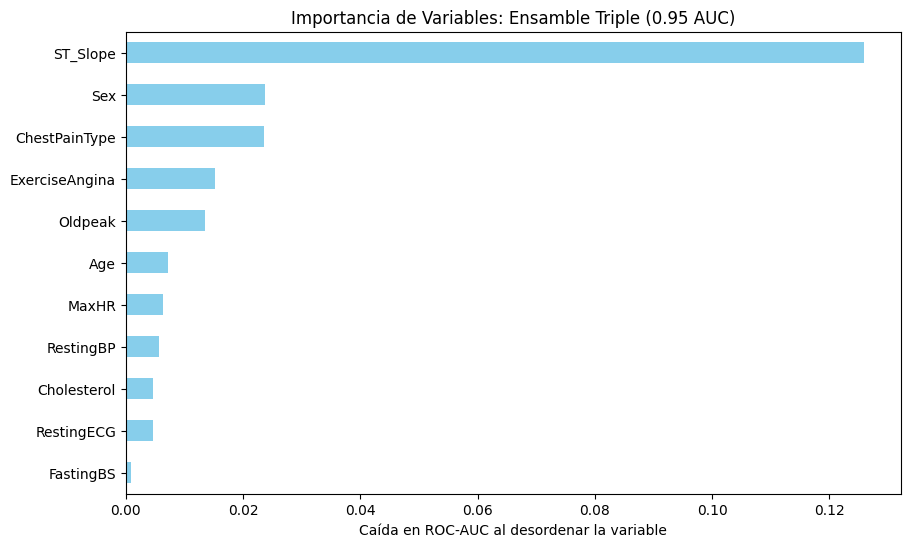

In [ ]:
plot_ensemble_importance(modelo_ensamble_final, df.drop(columns=["HeartDisease"]), df["HeartDisease"])

### Run this code in terminal to try the model 
python -m streamlit run app.py 